In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('./datasets/S02-hw-dataset.csv')
# Создание датасета

print(df.head(5))
print()
print(df.tail(5))
print()
print(df.info())
print()
print(df.describe())
print()
print(df)
# Демонстрация функций


   user_id   age country  purchases  revenue
0        1  25.0      FR          7      749
1        2  24.0      RU          5     1115
2        3  52.0      FR          7      399
3        4  31.0      RU          6      654
4        5   NaN      DE          6     1296

    user_id   age country  purchases  revenue
36       37  18.0      DE          4     1104
37       38  35.0      DE          3      738
38       39  39.0      FR          7     1162
39       40  34.0      RU          7     2086
40       10  24.0      RU          7      511

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB
None

  

In [ ]:
print('Percentage of data loss in columns')
for column in df.columns:
    print(column, ": ", df[column].isna().sum() / len(df) * 100, "%")
# Процент потери данных в столбцах

Percentage of data loss in columns
user_id :  0.0 %
age :  4.878048780487805 %
country :  0.0 %
purchases :  0.0 %
revenue :  0.0 %


In [44]:
dupl_sum = df.duplicated().sum()
dupl_index = df[df.duplicated(keep='first')].index.tolist()
print(f'Количество дубликатов: {dupl_sum}')
print(f'Индексы дубликатов: {dupl_index}')

Количество дубликатов: 1
Индексы дубликатов: [40]


In [64]:
negative_purchases = df[df['purchases'] < 0]
print('Люди с отрицательными покупками:\n', negative_purchases[['user_id', 'purchases']])

Люди с отрицательными покупками:
    user_id  purchases
5        6         -1


In [65]:
strange_age = df[df['age'] > 100]
print('Люди с подозрительным возрастом:\n', strange_age[['user_id', 'age']])

Люди с подозрительным возрастом:
    user_id    age
5        6  120.0


In [ ]:
age_nan = df[df['age'].isna()]
print('Значения nan в возрасте:\n', age_nan[['user_id', 'age']])

Значения nan в возрасте:
     user_id  age
4         5  NaN
12       13  NaN


In [ ]:
zero_revenue = df[(df['revenue'] == 0) & (df['purchases'] > 0)]
print('Нулевой доход при ненулевых покупках:\n', zero_revenue[['user_id', 'purchases', 'revenue']])
"""В датасете встречается дубликат, в столбце возраста присутствуют пропуски, так же присутствует подозрительно долгоживущий человек, и присутствует человек со странным доходом)"""

Нулевой доход при ненулевых покупках:
     user_id  purchases  revenue
10       11          4        0


In [68]:
country_counts = df['country'].value_counts()
print("Частота по странам:")
print(country_counts)
print()

Частота по странам:
country
RU    13
FR    12
US     8
DE     6
CN     2
Name: count, dtype: int64



In [71]:
bins = [0, 18, 30, 45, 65, 100]
labels = ['<18', '18-30', '31-45', '46-65', '65+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

grouped = df.groupby(['country', 'age_group']).agg({
    'user_id': 'count',
    'purchases': ['mean', 'sum'],
    'revenue': ['mean', 'sum']
})

print("Агрегированная статистика по странам и возрастным группам:")
print(grouped)

Агрегированная статистика по странам и возрастным группам:
                  user_id purchases          revenue      
                    count      mean sum         mean   sum
country age_group                                         
CN      <18             0       NaN   0          NaN     0
        18-30           2  4.500000   9  1054.000000  2108
        31-45           0       NaN   0          NaN     0
        46-65           0       NaN   0          NaN     0
        65+             0       NaN   0          NaN     0
DE      <18             0       NaN   0          NaN     0
        18-30           1  4.000000   4  1104.000000  1104
        31-45           3  7.666667  23  1857.000000  5571
        46-65           1  6.000000   6   702.000000   702
        65+             0       NaN   0          NaN     0
FR      <18             0       NaN   0          NaN     0
        18-30           3  3.333333  10   310.666667   932
        31-45           3  6.333333  19  1105.333333  33

C:\Users\Nikita\AppData\Local\Temp\ipykernel_6384\390154692.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['country', 'age_group']).agg({


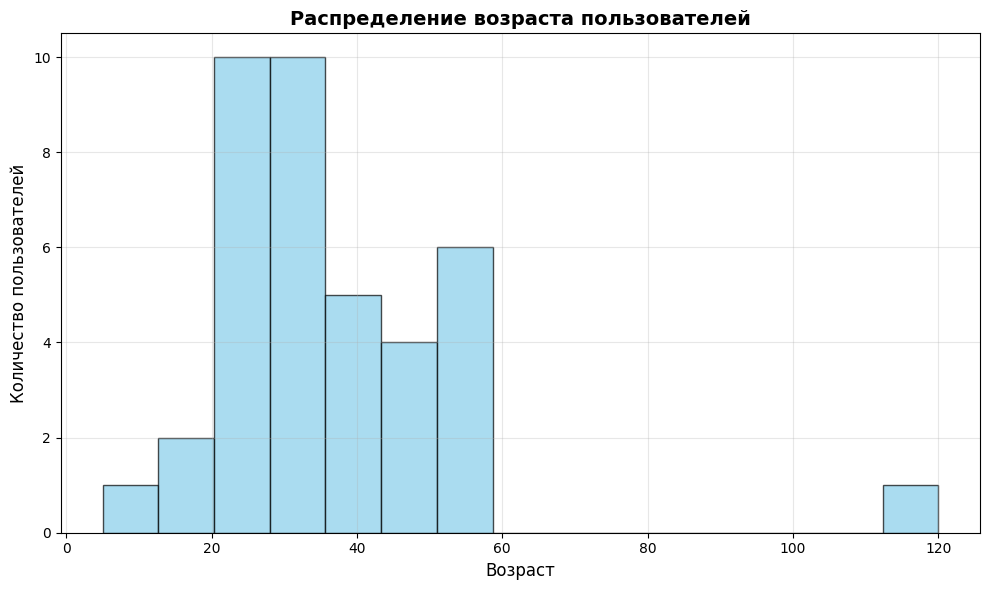

C:\Users\Nikita\AppData\Local\Temp\ipykernel_6384\616934880.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_box, x='country', y='revenue', palette='Set2')


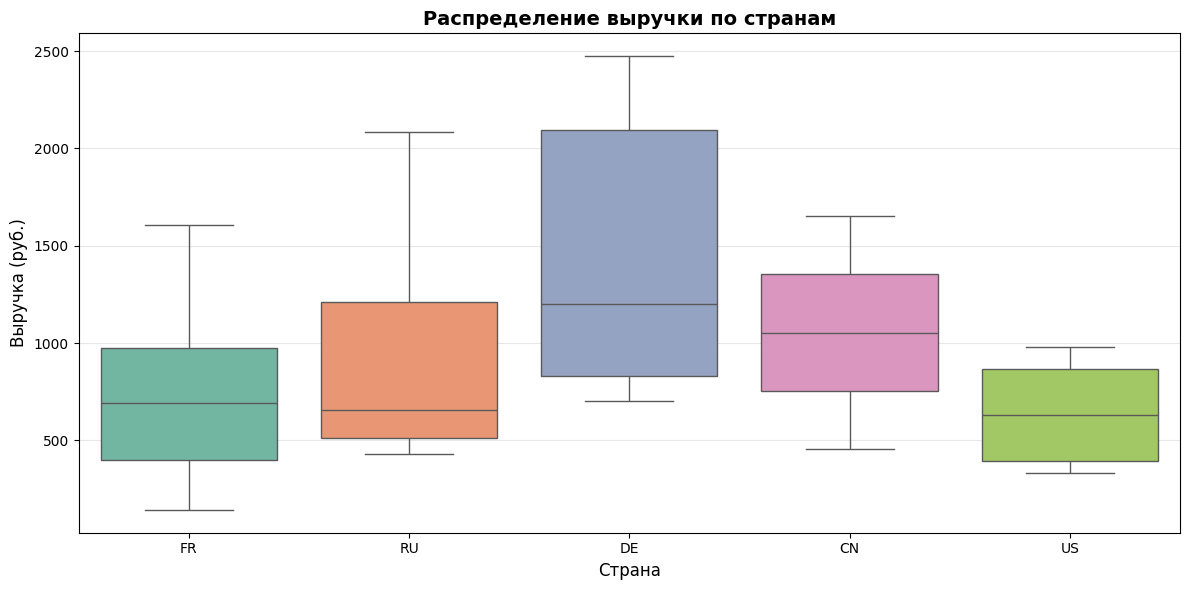

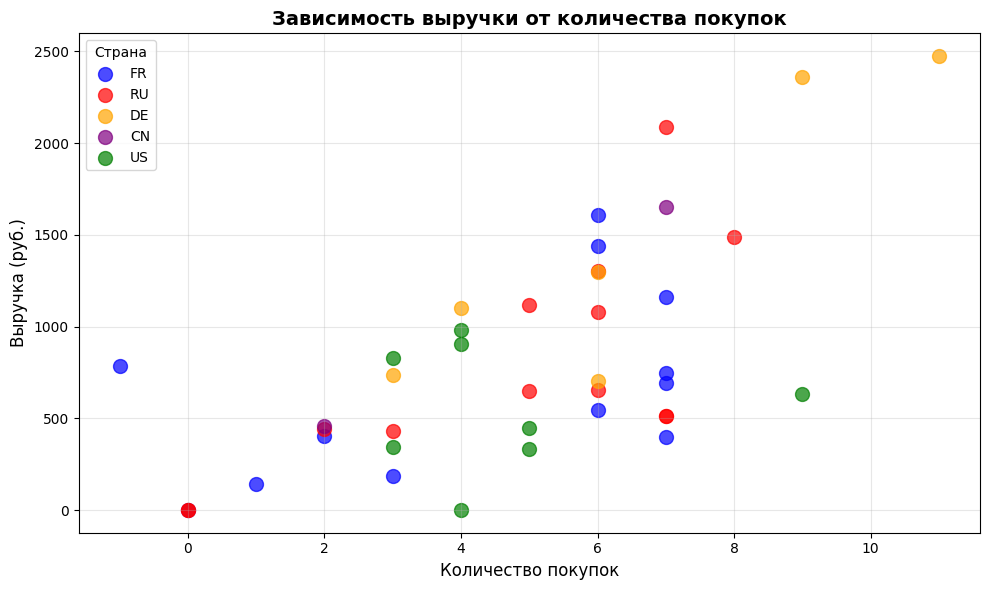

In [75]:
# Гистограмма распределения возраста
plt.figure(figsize=(10, 6))
plt.hist(df['age'].dropna(), bins=15, edgecolor='black', alpha=0.7, color='skyblue')
plt.xlabel('Возраст', fontsize=12)
plt.ylabel('Количество пользователей', fontsize=12)
plt.title('Распределение возраста пользователей', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()

# Сохраняем гистограмму
plt.savefig('figures/age_distribution.png', dpi=300, bbox_inches='tight')
plt.show()
# Распределение возраста показывает концентрацию пользователей в диапазоне 20-45 лет.

# Боксплот выручки по странам
plt.figure(figsize=(12, 6))
df_box = df[df['revenue'] > 0]  # Исключаем нулевую выручку для наглядности
sns.boxplot(data=df_box, x='country', y='revenue', palette='Set2')
plt.xlabel('Страна', fontsize=12)
plt.ylabel('Выручка (руб.)', fontsize=12)
plt.title('Распределение выручки по странам', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()

# Сохраняем боксплот
plt.savefig('figures/revenue_by_country_boxplot.png', dpi=300, bbox_inches='tight')
plt.show()
#Боксплот показывает разброс выручки: Германия имеет высокие значения, Китай - малую выборку.


# SCATTER PLOT: кол-во покупок против выручки
plt.figure(figsize=(10, 6))
colors = {'FR': 'blue', 'RU': 'red', 'US': 'green', 'DE': 'orange', 'CN': 'purple'}

for country in df['country'].unique():
    country_data = df[df['country'] == country]
    plt.scatter(country_data['purchases'], country_data['revenue'], 
                alpha=0.7, s=100, label=country, color=colors.get(country, 'gray'))

plt.xlabel('Количество покупок', fontsize=12)
plt.ylabel('Выручка (руб.)', fontsize=12)
plt.title('Зависимость выручки от количества покупок', fontsize=14, fontweight='bold')
plt.legend(title='Страна')
plt.grid(True, alpha=0.3)
plt.tight_layout()

# Сохраняем scatter plot
plt.savefig('figures/purchases_vs_revenue_scatter.png', dpi=300, bbox_inches='tight')
plt.show()
# Диаграмма показывает положительную корреляцию между покупками и выручкой. Есть выбросы: пользователи с малым количеством покупок, но высокой выручкой.